# Scraping MoneyControl.com using Selenium

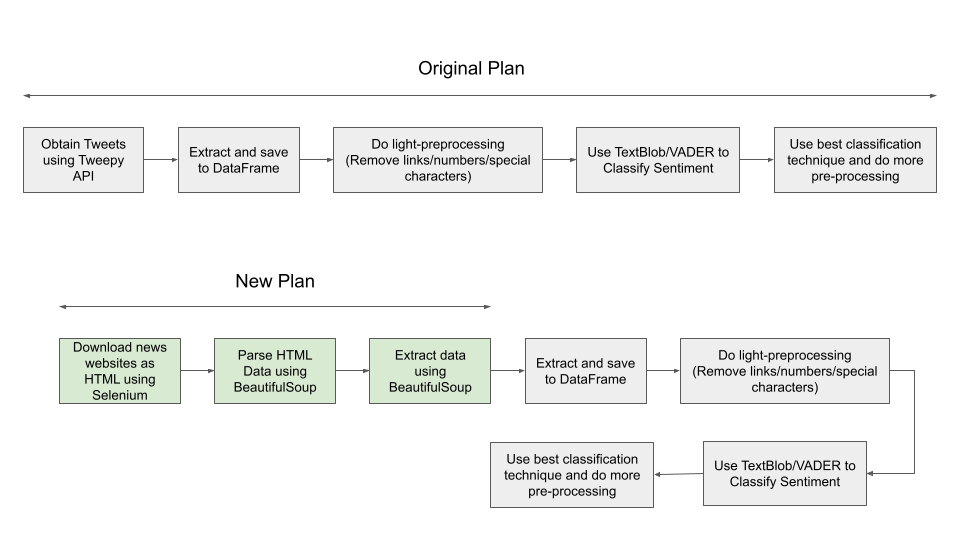

## Summary
**Original plan**
1. Our original plan was to use Tweepy API to obtain the tweets from 3 different twitter profiles, "@WatcherGuru", "Investingcom" and "UnusualWhales". I am tasked to scrape and obtain tweets from "@WatcherGuru" to perform sentiment analysis.
2. Next, I will extract the tweets using the API and put it into a dataframe "df"
3. I will do light-preprocessing such as removing links/numbers/special characters in a new dataset "df1"
4. I will then use TextBlob and VADER to classify sentiments in a new dataframe "df2"
5. Lastly i will choose the best classification technique, and remove the unnecessary columns in "df2" and create a new dataframe "df_cleaned" before exporting out as CSV

**New plan (In Jupyter Notebook)**
1. Our revised strategy involves harvesting news headlines regarding the cryptocurrency and stock markets from three prominent sources, namely "moneycontrol.com", "ft.com", and "investing.com", with my task being focused on "moneycontrol.com".
2. Utilizing Selenium, we will acquire the HTML page as a static asset and store it locally.
3. By leveraging Beautifulsoup, we will parse the HTML data and extract the relevant information.
4. The extracted data will be organized into a Pandas dataframe called "df".
5. Subsequently, we will undertake preliminary data processing, including the elimination of links and special characters, to refine the data.
6. We will then utilize Textblob and VADER to classify the sentiments in a new dataframe "df2".
7. Finally, we will determine the most effective classification approach, "VADER", and streamline "df2" by removing unneeded columns to create a new, refined dataframe "df_cleaned", which we will export as a CSV file.

## Importing all libraries

In [60]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Downloading website pages to HTML 

In [2]:
# Create a new instance of the Chrome driver
driver = webdriver.Chrome()

# Go to the website
driver.get("https://www.moneycontrol.com/news/tags/cryptocurrency.html")

# Wait for the pop-up to appear
try:
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//button[contains(text(), 'No thanks')]"))
    )
    element.click() # click on the "No Thanks" button
except TimeoutError:
    print("Pop-up did not appear.")

# Wait for the page to load
sleep(5)

# Get the current page number
current_page = 1

# Set the maximum number of pages to scrape
max_pages = 40

In [3]:
while current_page <= max_pages:
    # Wait for the page to load
    sleep(5)

    # Get the page source
    page_source = driver.page_source

    # Save the page source to a file
    with open(f"cryptocurrency_page_{current_page}.html", "w") as file:
        file.write(page_source)

    # Check if there is a next page button
    #next_page_button = driver.find_elements(By.XPATH,"//a[@class='last']/span[text()='»']")
    next_page_button = driver.find_elements(By.XPATH, "//a[@class='last']/span[text()='»']")
    if next_page_button:
        next_page_button[0].click()
        current_page += 1
    else:
        break

In [4]:
# Close the browser
driver.quit()

In [5]:
import os
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
# Create an empty list to store the extracted data
data = []

### Reading HTML files to extract content using BeautifulSoup 

In [7]:
# Loop through each html file
for i in range(1, 40):
    file_path = f"cryptocurrency_page_{i}.html"

    # Open the html file and parse it with BeautifulSoup
    with open(file_path, "r") as file:
        soup = BeautifulSoup(file.read(), "html.parser")

    # Find all elements with the tag "h2"
    lis = soup.find_all("h2")

    # Extract the text of any "a" tag within those elements
    a_texts = [li.find("a").get_text() for li in lis if li.find("a")]

    # Append the extracted data to the list
    data.extend(a_texts)

In [8]:
# Create a dataframe from the extracted data
df = pd.DataFrame(data, columns=["Headlines"])

# Data Understanding

In [103]:
# Reset all dataframes
del df
del df1
del df2
del df_cleaned

In [10]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows: ", duplicate_rows.sum())

Number of duplicate rows:  5


In [11]:
# Drop duplicates
df = df.drop_duplicates()

In [12]:
df.head()

,Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...
1,Dutch central bank fines cryptocurrency exchan...
2,Crypto is worth fixing. Regulators should get ...
3,Cryptocurrency roundup for January 26: Circle'...
4,Cryptocurrency roundup for January 25: Binance...


### Find the number of rows in dataset

In [13]:
print("Total number of rows in Dataframe:", df.shape[0])

Total number of rows in Dataframe: 595


In [14]:
df.head()

,Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...
1,Dutch central bank fines cryptocurrency exchan...
2,Crypto is worth fixing. Regulators should get ...
3,Cryptocurrency roundup for January 26: Circle'...
4,Cryptocurrency roundup for January 25: Binance...


## Conclusion

Conclusion write here

In [15]:
import re
import html
import lxml
import html5lib

# Data Cleaning (Part 1) 
## (Removing links, Removing Empty Rows, Normalizating fonts, Removing Non- Alphanumeric Characters)

## Importing Libraries

In [189]:
import nltk

# Download the necessary NLTK packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Import the necessary libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist

from nltk.util import ngrams
from nltk.tag import pos_tag
from nltk.tokenize import MWETokenizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will only be doing light pre-processing technqiues as we want to test TextBLog and VADER to see how many they can
identify the sentiments as neutral/positive/negative first.

In [108]:
# Clean the dataframe

# Define a regular expression pattern to match special characters and numbers
pattern = r'[^a-zA-Z0-9\s]'
# Use the `re.sub()` function to remove special characters and numbers
df['Filtered_Headlines'] = df['Headlines'].apply(lambda x: re.sub(pattern, '', x))

# remove empty rows
df = df.dropna() 

#df.dropna(inplace = True) # remove empty rows

In [109]:
df.head(20)

,Headlines,Filtered_Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...
5,Top Cryptocurrency Prices Today January 25: Bi...,Top Cryptocurrency Prices Today January Bitco...
6,Cryptocurrency roundup for January 24: Cardano...,Cryptocurrency roundup for January Cardano hi...
7,Top Cryptocurrency Prices Today January 24: Bi...,Top Cryptocurrency Prices Today January Bitco...
8,Top Cryptocurrency Prices Today January 23: Ma...,Top Cryptocurrency Prices Today January Major...
9,"Bitcoin rises 2.3% to $23,199",Bitcoin rises to


In [110]:
print("Total number of rows in Dataframe:", df.shape[0])

Total number of rows in Dataframe: 595


In [111]:
#df = df.drop(columns='POS_Tags')
#df = df.drop(columns='Filtered_Headlines')
#df = df.drop(columns='Stemmed_Headlines')



#Vader_Sentiment	Tokenized_headlines	Stemmed_Headlines	POS_Tags	Filtered_Headlines

In [112]:
df.head(50)

,Headlines,Filtered_Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...
5,Top Cryptocurrency Prices Today January 25: Bi...,Top Cryptocurrency Prices Today January Bitco...
6,Cryptocurrency roundup for January 24: Cardano...,Cryptocurrency roundup for January Cardano hi...
7,Top Cryptocurrency Prices Today January 24: Bi...,Top Cryptocurrency Prices Today January Bitco...
8,Top Cryptocurrency Prices Today January 23: Ma...,Top Cryptocurrency Prices Today January Major...
9,"Bitcoin rises 2.3% to $23,199",Bitcoin rises to


In [113]:
df.head()

,Headlines,Filtered_Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...


# Classify Tweets using TextBlob

## We will now test and classify the filtered sentiment to see how many classifications we have before doing more pre-processing of texts

#### Using Polarity, if polarity is positive value = positive, if negative value = negative, if 0 = neutral

In [114]:
from textblob import  TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [115]:
# Create function text_blob sentiment to classify text in new column
def textblob_sentiment(text):
    return TextBlob(text).sentiment[0]

In [116]:
# Create new column to show polarity of tweets
df['Textblob_Sentiment'] = df['Filtered_Headlines'].apply (lambda x:textblob_sentiment(x))

In [117]:
df.head(10)

,Headlines,Filtered_Headlines,Textblob_Sentiment
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,0.000000
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,0.000000
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,0.300000
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,0.200000
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,0.200000
5,Top Cryptocurrency Prices Today January 25: Bi...,Top Cryptocurrency Prices Today January Bitco...,0.333333
6,Cryptocurrency roundup for January 24: Cardano...,Cryptocurrency roundup for January Cardano hi...,0.166667
7,Top Cryptocurrency Prices Today January 24: Bi...,Top Cryptocurrency Prices Today January Bitco...,0.500000
8,Top Cryptocurrency Prices Today January 23: Ma...,Top Cryptocurrency Prices Today January Major...,0.120833
9,"Bitcoin rises 2.3% to $23,199",Bitcoin rises to,0.000000


In [118]:
df['TextBlob_Classification'] = df['Textblob_Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [119]:
df.head(30)

,Headlines,Filtered_Headlines,Textblob_Sentiment,TextBlob_Classification
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,0.000000,neutral
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,0.000000,neutral
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,0.300000,positive
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,0.200000,positive
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,0.200000,positive
5,Top Cryptocurrency Prices Today January 25: Bi...,Top Cryptocurrency Prices Today January Bitco...,0.333333,positive
6,Cryptocurrency roundup for January 24: Cardano...,Cryptocurrency roundup for January Cardano hi...,0.166667,positive
7,Top Cryptocurrency Prices Today January 24: Bi...,Top Cryptocurrency Prices Today January Bitco...,0.500000,positive
8,Top Cryptocurrency Prices Today January 23: Ma...,Top Cryptocurrency Prices Today January Major...,0.120833,positive
9,"Bitcoin rises 2.3% to $23,199",Bitcoin rises to,0.000000,neutral


# Classify Tweets using VADER

#### Using Comp score metric that calculates sum of lexicon rataings, normalized between -1(most negative) and +1 (most positive)

In [120]:
def sentiment_vader(text):
    over_all_polarity = sid.polarity_scores(text)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [121]:
sid = SentimentIntensityAnalyzer()

In [122]:
df['Vader_Sentiment'] = df['Filtered_Headlines'].apply(lambda x: sentiment_vader(x))

In [123]:
df.head(30)

,Headlines,Filtered_Headlines,Textblob_Sentiment,TextBlob_Classification,Vader_Sentiment
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,0.000000,neutral,positive
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,0.000000,neutral,neutral
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,0.300000,positive,positive
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,0.200000,positive,negative
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,0.200000,positive,neutral
5,Top Cryptocurrency Prices Today January 25: Bi...,Top Cryptocurrency Prices Today January Bitco...,0.333333,positive,positive
6,Cryptocurrency roundup for January 24: Cardano...,Cryptocurrency roundup for January Cardano hi...,0.166667,positive,positive
7,Top Cryptocurrency Prices Today January 24: Bi...,Top Cryptocurrency Prices Today January Bitco...,0.500000,positive,positive
8,Top Cryptocurrency Prices Today January 23: Ma...,Top Cryptocurrency Prices Today January Major...,0.120833,positive,positive
9,"Bitcoin rises 2.3% to $23,199",Bitcoin rises to,0.000000,neutral,neutral


In [124]:
print("TextBlob Sentiments")
classification_counts = df['TextBlob_Classification'].value_counts()
print("Positive: ", classification_counts['positive'])
print("Neutral: ", classification_counts['neutral'])
print("Negative: ", classification_counts['negative'])



print("\n\nVADER Sentiments")
classification_counts = df['Vader_Sentiment'].value_counts()
print("Positive: ", classification_counts['positive'])
print("Neutral: ", classification_counts['neutral'])
print("Negative: ", classification_counts['negative'])

#Print total number of rows
print("\nTotal number of rows in TextBlob_Classification Column: ",df['TextBlob_Classification'].shape[0])

#Print total number of rows
print("Total number of rows in Vader_Sentiment Column: ",df['Vader_Sentiment'].shape[0])

TextBlob Sentiments
Positive:  251
Neutral:  262
Negative:  82


VADER Sentiments
Positive:  205
Neutral:  223
Negative:  167

Total number of rows in TextBlob_Classification Column:  595
Total number of rows in Vader_Sentiment Column:  595


## Justification

I decided to choose the VADER Sentiment Analyzer as it shows a balance in the dataset such that there are **205** Postive Sentiments , **223** Neutral Sentiments and **167** Negative Sentiment.

Now, we will be classifying the neutral sentiments manually and will be labelling the neutral sentiments as **positive**.

In [125]:
# Dropping classification rows
df = df.drop(columns='Textblob_Sentiment')
df = df.drop(columns='TextBlob_Classification')

In [126]:
# Drop classification rows
#df = df.drop(columns='Vader_Sentiment')
#df = df.drop(columns='Filtered_Headlines')
#df = df.drop(columns='Tokenized_headlines')

In [127]:
df.head()

,Headlines,Filtered_Headlines,Vader_Sentiment
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral


In [128]:
# Create new dataframe df1 to do more pre-processing
df1 = pd.DataFrame(df)

# Data Cleaning Part 2 (Pre-Processing)

1. Removing Punctuation, Numbers, Special Characters

2. Stopwords removal: Removing common words that do not carry much meaning. Example: "The cat sat on the mat" -> ["cat", "sat", "mat"]

3. Normalization: Converting text to a standard format. Example: " normalizing all the text to lowercase" -> "normalizing all the text to lowercase"

4. Tokenization: Splitting a string of text into individual words or phrases. Example: "The cat sat on the mat" -> ["The", "cat", "sat", "on", "the", "mat"]

5. Stemming: Reducing words to their base form. Example: "running" -> "run"

6. Lemmatization: Obtaining the root form of a word. Example: "was" -> "be"

7. Part-of-Speech (POS) Tagging: Identifying the grammatical role of each word in a sentence. Example: "The cat sat on the mat" -> ["The/DT", "cat/NN", "sat/VBD", "on/IN", "the/DT", "mat/NN"]

In [204]:
# Tokenization
df1['Tokenized_headlines'] = df['Filtered_Headlines'].apply(lambda x: word_tokenize(x))
df1.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Stemmed_Headlines,Lemmatized_Headlines,POS_Tags,Filtered_Headlines_Wordcount,Lemmatized_Wordcount,Tokenized_headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiaback, defi, app, flint, discontinu, fl...",sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl...",9,9,"[Sequoiabacked, DeFi, app, Flint, discontinues..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fine, cryptocurr, excha...",dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine...",10,9,"[Dutch, central, bank, fines, cryptocurrency, ..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fix, regul, get, move]",crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,...",8,6,"[Crypto, is, worth, fixing, Regulators, should..."
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurr, roundup, januari, circl, billion,...",cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",21,14,"[Cryptocurrency, roundup, for, January, Circle..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurr, roundup, januari, binanc, process...",cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",19,12,"[Cryptocurrency, roundup, for, January, Binanc..."


In [130]:
# Drop Filtered_Headlines
#df1 = df1.drop(columns='Stemmed_Headlines')

In [131]:
# download the stopwords
stop_words = set(stopwords.words('english'))

In [132]:
# Removing stopwords
df1['Tokenized_headlines'] = df1['Tokenized_headlines'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df1.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Tokenized_headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[Sequoiabacked, DeFi, app, Flint, discontinues..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[Dutch, central, bank, fines, cryptocurrency, ..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[Crypto, worth, fixing, Regulators, get, moving]"
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[Cryptocurrency, roundup, January, Circles, bi..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[Cryptocurrency, roundup, January, Binance, pr..."


In [133]:
# convert to lower case
df1['Tokenized_headlines'] = df1['Tokenized_headlines'].apply(lambda x: [word.lower() for word in x])
df1.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Tokenized_headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiabacked, defi, app, flint, discontinues..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fines, cryptocurrency, ..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fixing, regulators, get, moving]"
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurrency, roundup, january, circles, bi..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurrency, roundup, january, binance, pr..."


In [134]:
# Stemming
# Create a new Porter stemmer object
stemmer = PorterStemmer()

# Use the apply() method to stem the words
df1['Stemmed_Headlines'] = df1['Tokenized_headlines'].apply(lambda x: [stemmer.stem(word) for word in x])
df1.head(30)

,Headlines,Filtered_Headlines,Vader_Sentiment,Tokenized_headlines,Stemmed_Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiabacked, defi, app, flint, discontinues...","[sequoiaback, defi, app, flint, discontinu, fl..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fines, cryptocurrency, ...","[dutch, central, bank, fine, cryptocurr, excha..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fixing, regulators, get, moving]","[crypto, worth, fix, regul, get, move]"
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurrency, roundup, january, circles, bi...","[cryptocurr, roundup, januari, circl, billion,..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurrency, roundup, january, binance, pr...","[cryptocurr, roundup, januari, binanc, process..."
5,Top Cryptocurrency Prices Today January 25: Bi...,Top Cryptocurrency Prices Today January Bitco...,positive,"[top, cryptocurrency, prices, today, january, ...","[top, cryptocurr, price, today, januari, bitco..."
6,Cryptocurrency roundup for January 24: Cardano...,Cryptocurrency roundup for January Cardano hi...,positive,"[cryptocurrency, roundup, january, cardano, hi...","[cryptocurr, roundup, januari, cardano, hit, g..."
7,Top Cryptocurrency Prices Today January 24: Bi...,Top Cryptocurrency Prices Today January Bitco...,positive,"[top, cryptocurrency, prices, today, january, ...","[top, cryptocurr, price, today, januari, bitco..."
8,Top Cryptocurrency Prices Today January 23: Ma...,Top Cryptocurrency Prices Today January Major...,positive,"[top, cryptocurrency, prices, today, january, ...","[top, cryptocurr, price, today, januari, major..."
9,"Bitcoin rises 2.3% to $23,199",Bitcoin rises to,neutral,"[bitcoin, rises]","[bitcoin, rise]"


In [135]:
# Lemmatization
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to apply the lemmatization to each word in a list
def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text]

# Lemmatize the tokenized headlines
df1['Lemmatized_Headlines'] = df1['Stemmed_Headlines'].apply(lemmatize_text)
df1.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Tokenized_headlines,Stemmed_Headlines,Lemmatized_Headlines
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiabacked, defi, app, flint, discontinues...","[sequoiaback, defi, app, flint, discontinu, fl...","[sequoiaback, defi, app, flint, discontinu, fl..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fines, cryptocurrency, ...","[dutch, central, bank, fine, cryptocurr, excha...","[dutch, central, bank, fine, cryptocurr, excha..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fixing, regulators, get, moving]","[crypto, worth, fix, regul, get, move]","[crypto, worth, fix, regul, get, move]"
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurrency, roundup, january, circles, bi...","[cryptocurr, roundup, januari, circl, billion,...","[cryptocurr, roundup, januari, circl, billion,..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurrency, roundup, january, binance, pr...","[cryptocurr, roundup, januari, binanc, process...","[cryptocurr, roundup, januari, binanc, process..."


In [136]:
# POS (Parts of Speech) Tagging
df1['POS_Tags'] = df1['Lemmatized_Headlines'].apply(nltk.pos_tag)
df1.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Tokenized_headlines,Stemmed_Headlines,Lemmatized_Headlines,POS_Tags
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiabacked, defi, app, flint, discontinues...","[sequoiaback, defi, app, flint, discontinu, fl...","[sequoiaback, defi, app, flint, discontinu, fl...","[(sequoiaback, NN), (defi, NN), (app, NN), (fl..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fines, cryptocurrency, ...","[dutch, central, bank, fine, cryptocurr, excha...","[dutch, central, bank, fine, cryptocurr, excha...","[(dutch, JJ), (central, JJ), (bank, NN), (fine..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fixing, regulators, get, moving]","[crypto, worth, fix, regul, get, move]","[crypto, worth, fix, regul, get, move]","[(crypto, NN), (worth, JJ), (fix, NN), (regul,..."
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurrency, roundup, january, circles, bi...","[cryptocurr, roundup, januari, circl, billion,...","[cryptocurr, roundup, januari, circl, billion,...","[(cryptocurr, NN), (roundup, NN), (januari, NN..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurrency, roundup, january, binance, pr...","[cryptocurr, roundup, januari, binanc, process...","[cryptocurr, roundup, januari, binanc, process...","[(cryptocurr, NN), (roundup, NN), (januari, NN..."


# Data Analysis & Exploration

## Find word count in both DataFrames

In [138]:
#df = df.drop(columns='Filtered_Headlines_Wordcount')

In [139]:
# Create new dataframe df1 to do more pre-processing
df2 = pd.DataFrame(df1)


In [140]:
# Convert list to string in "Lemmatized_Headlines" and "Filtered_Headlines"
# Create a DataFrame from the list of strings
df2['Lemmatized_Headlines'] = df2['Lemmatized_Headlines'].apply(lambda x: ' '.join(x))

In [141]:
df2.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Stemmed_Headlines,Lemmatized_Headlines,POS_Tags
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiaback, defi, app, flint, discontinu, fl...",sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl..."
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fine, cryptocurr, excha...",dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine..."
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fix, regul, get, move]",crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,..."
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurr, roundup, januari, circl, billion,...",cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN..."
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurr, roundup, januari, binanc, process...",cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN..."


In [142]:
# Create a new column 'word_count' that contains the number of words in each row
df2['Filtered_Headlines_Wordcount'] = df['Headlines'].apply(lambda x: len(x.split()))
df2.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Stemmed_Headlines,Lemmatized_Headlines,POS_Tags,Filtered_Headlines_Wordcount
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiaback, defi, app, flint, discontinu, fl...",sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl...",9
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fine, cryptocurr, excha...",dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine...",10
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fix, regul, get, move]",crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,...",8
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurr, roundup, januari, circl, billion,...",cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",21
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurr, roundup, januari, binanc, process...",cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",19


In [143]:
# Create a new column 'word_count' that contains the number of words in each row
df2['Lemmatized_Wordcount'] = df2['Lemmatized_Headlines'].apply(lambda x: len(x.split()))
df2.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Stemmed_Headlines,Lemmatized_Headlines,POS_Tags,Filtered_Headlines_Wordcount,Lemmatized_Wordcount
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiaback, defi, app, flint, discontinu, fl...",sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl...",9,9
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fine, cryptocurr, excha...",dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine...",10,9
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fix, regul, get, move]",crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,...",8,6
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurr, roundup, januari, circl, billion,...",cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",21,14
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurr, roundup, januari, binanc, process...",cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",19,12


In [154]:
# Get the total sum of word count for the entire column
total_word_count_df = df2['Filtered_Headlines_Wordcount'].sum()
total_word_count_df2 = df2['Lemmatized_Wordcount'].sum()

In [155]:
df_wordcount = pd.DataFrame({'Filtered_Headlines': total_word_count_df, 'Lemmatized_Wordcount': total_word_count_df2}, index=index)

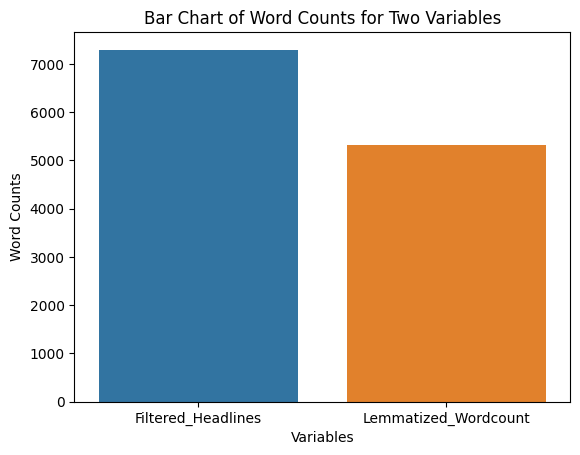

Total number of words in Filtered_Headlines 7293
Total number of words in Lemmatized_Headlines 5312


In [190]:
# Bar chart on headlines with light-preprocessing vs headlines with full-preprocessing and removal of stopwords

# Plot the data using a bar chart
sns.barplot(data=df_wordcount)

# Label the x and y axes and give the chart a title
plt.xlabel('Variables')
plt.ylabel('Word Counts')
plt.title('Bar Chart of Word Counts for Two Variables')

# Show the chart
plt.show()

print("Total number of words in Filtered_Headlines", total_word_count_df)
print("Total number of words in Lemmatized_Headlines", total_word_count_df2)

## Creating wordcloud to find most common words

This shows that we successfully cleaned the dataset by using every pre-proecssing techniques available.

In [160]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [165]:
# Create a string from the desired column in your dataframe
df1_wordcloud = " ".join(df["Headlines"].tolist())
df2_wordcloud = " ".join(df2["Lemmatized_Headlines"].tolist())

# Create the wordcloud object
wordcloud_df = WordCloud().generate(df1_wordcloud)
wordcloud_df2 = WordCloud().generate(df2_wordcloud)

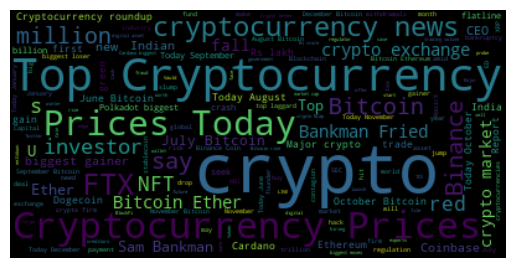

In [166]:
# Plot the wordcloud for "Headlines"
plt.imshow(wordcloud_df, interpolation='bilinear')
plt.axis("off")
plt.show()

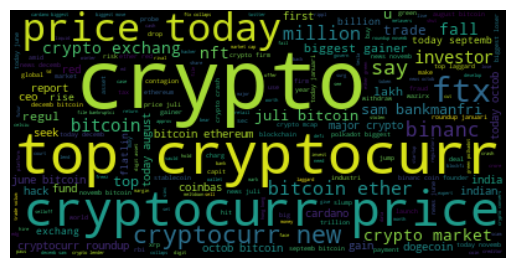

In [167]:
# Plot the wordcloud for "Lemmatized Headlines"
plt.imshow(wordcloud_df2, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can observe from the WordClouds, the most frequently occurring words such as **"Cryptocurrency", "price", "crypto market", "investor", and "nft"** are present in both, indicating that the cleaned data still contains important keywords for performing text classification and modeling.


### Feature Extraction
To classify the text into any category, we need to define some criteria. On the basis of those criteria, our classifier will learn that a particular kind of text falls in a particular category. This kind of criteria is known as **feature**. We can define one or more feature to train our classifier.

In this example, we will use the **top-N words feature**.

### Create Frequency Distribution of all words
Frequency Distribution will calculate the number of occurence of each word in the entire list of words.

In [208]:
from nltk import FreqDist
# print frequency distribution of words in the "Tokenized_headlines" column
all_words = [word for sublist in df1["Tokenized_headlines"].tolist() for word in sublist]
all_words_frequency = FreqDist(all_words)

# print frequency distribution
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

<FreqDist with 2018 samples and 6841 outcomes>
[('to', 169), ('Bitcoin', 167), ('Cryptocurrency', 165), ('in', 165), ('crypto', 157), ('Top', 131), ('Prices', 113), ('on', 113), ('Today', 104), ('and', 102)]


### Frequency Distribution of cleaned words list

Below is the frequency distribution of the new list after removing stopwords and punctuation.

In [213]:
# print frequency distribution of words in the "Tokenized_headlines" column
all_words = [word for sublist in df1["POS_Tags"].tolist() for word in sublist]
all_words_frequency = FreqDist(all_words)

# print frequency distribution
print (all_words_frequency)

# print 10 most frequently occurring words
print (all_words_frequency.most_common(10))

<FreqDist with 1787 samples and 5312 outcomes>
[(('crypto', 'NN'), 233), (('cryptocurr', 'NN'), 173), (('top', 'JJ'), 155), (('bitcoin', 'NN'), 147), (('price', 'NN'), 117), (('today', 'NN'), 104), (('news', 'NN'), 66), (('cryptocurr', 'JJ'), 52), (('binanc', 'NN'), 49), (('biggest', 'JJS'), 48)]


Previously, before removing stopwords and punctuation, the frequency distribution was:

* FreqDist with 87146 samples and **5508556** outcomes

Now, the frequency distribution is:

* FreqDist with 60947 samples and **2343890** outcomes

This shows that after removing around **3,164,666** stop words, numbers and punctuation, the outcomes/words number has reduced to around half of the original size.

The most common words or highly occurring words list has also got meaningful words in the list. Before, the first 10 frequently occurring words were only stop-words and punctuations.

### Create Word Feature using 2000 most frequently occurring words

In [215]:
print (len(all_words_frequency)) 
 
# get 2000 frequently occuring words
most_common_words = all_words_frequency.most_common(2000)

# print the first 10 most frequently occuring words
print (most_common_words[:10])

# print the last 10 most frequently occuring words
print (most_common_words[1990:])

# the most common words list's elements are in the form of tuple get 
# only the first element of each tuple of the word list
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

1787
[(('crypto', 'NN'), 233), (('cryptocurr', 'NN'), 173), (('top', 'JJ'), 155), (('bitcoin', 'NN'), 147), (('price', 'NN'), 117), (('today', 'NN'), 104), (('news', 'NN'), 66), (('cryptocurr', 'JJ'), 52), (('binanc', 'NN'), 49), (('biggest', 'JJS'), 48)]
[]
[('crypto', 'NN'), ('cryptocurr', 'NN'), ('top', 'JJ'), ('bitcoin', 'NN'), ('price', 'NN'), ('today', 'NN'), ('news', 'NN'), ('cryptocurr', 'JJ'), ('binanc', 'NN'), ('biggest', 'JJS')]


# Saving DataFrame to CSV

We will now create a new dataframe **"df_cleaned"** to remove unnecessary columns and move the columns in order and reclassify the **"Neutral"** sentiments as **"Positive"**

In [169]:
# Create new dataframe df1 to do more pre-processing
df_cleaned = pd.DataFrame(df2)

In [174]:
df_cleaned.head()

,Headlines,Filtered_Headlines,Vader_Sentiment,Stemmed_Headlines,Lemmatized_Headlines,POS_Tags,Filtered_Headlines_Wordcount,Lemmatized_Wordcount
0,Sequoia-backed DeFi app Flint discontinues fla...,Sequoiabacked DeFi app Flint discontinues flag...,positive,"[sequoiaback, defi, app, flint, discontinu, fl...",sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl...",9,9
1,Dutch central bank fines cryptocurrency exchan...,Dutch central bank fines cryptocurrency exchan...,neutral,"[dutch, central, bank, fine, cryptocurr, excha...",dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine...",10,9
2,Crypto is worth fixing. Regulators should get ...,Crypto is worth fixing Regulators should get m...,positive,"[crypto, worth, fix, regul, get, move]",crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,...",8,6
3,Cryptocurrency roundup for January 26: Circle'...,Cryptocurrency roundup for January Circles b...,negative,"[cryptocurr, roundup, januari, circl, billion,...",cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",21,14
4,Cryptocurrency roundup for January 25: Binance...,Cryptocurrency roundup for January Binance pr...,neutral,"[cryptocurr, roundup, januari, binanc, process...",cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",19,12


In [175]:
# Removing Unnecessary columns
df_cleaned = df_cleaned.drop(columns='Headlines')
df_cleaned = df_cleaned.drop(columns='Filtered_Headlines')
df_cleaned = df_cleaned.drop(columns='Stemmed_Headlines')
df_cleaned = df_cleaned.drop(columns='Filtered_Headlines_Wordcount')
df_cleaned = df_cleaned.drop(columns='Lemmatized_Wordcount')

In [176]:
df_cleaned.head()

,Vader_Sentiment,Lemmatized_Headlines,POS_Tags
0,positive,sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl..."
1,neutral,dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine..."
2,positive,crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,..."
3,negative,cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN..."
4,neutral,cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN..."


In [177]:
# Moving Vader_Sentiment to the most right of the dataframe
cols = list(df_cleaned.columns)
cols.remove("Vader_Sentiment")
df_cleaned = df_cleaned[cols + ["Vader_Sentiment"]]

In [180]:
df_cleaned.head(20)

,Lemmatized_Headlines,POS_Tags,Vader_Sentiment
0,sequoiaback defi app flint discontinu flagship...,"[(sequoiaback, NN), (defi, NN), (app, NN), (fl...",positive
1,dutch central bank fine cryptocurr exchang coi...,"[(dutch, JJ), (central, JJ), (bank, NN), (fine...",neutral
2,crypto worth fix regul get move,"[(crypto, NN), (worth, JJ), (fix, NN), (regul,...",positive
3,cryptocurr roundup januari circl billion spac ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",negative
4,cryptocurr roundup januari binanc process mn b...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",neutral
5,top cryptocurr price today januari bitcoin eth...,"[(top, JJ), (cryptocurr, NN), (price, NN), (to...",positive
6,cryptocurr roundup januari cardano hit glitch ...,"[(cryptocurr, NN), (roundup, NN), (januari, NN...",positive
7,top cryptocurr price today januari bitcoin eth...,"[(top, JJ), (cryptocurr, NN), (price, NN), (to...",positive
8,top cryptocurr price today januari major crypt...,"[(top, JJ), (cryptocurr, NN), (price, NN), (to...",positive
9,bitcoin rise,"[(bitcoin, NNS), (rise, NN)]",neutral


In [181]:
# Count number of positives,neutrals and negatives
print("VADER Sentiments")
classification_counts = df_cleaned['Vader_Sentiment'].value_counts()
print("Positive: ", classification_counts['positive'])
print("Neutral: ", classification_counts['neutral'])
print("Negative: ", classification_counts['negative'])

#Print total number of rows
print("\nTotal number of rows in Vader_Sentiment Column: ",df_cleaned['Vader_Sentiment'].shape[0])

VADER Sentiments
Positive:  205
Neutral:  223
Negative:  167

Total number of rows in Vader_Sentiment Column:  595


In [182]:
# Change neutral to positive

def change_neutral_to_positive(sentiment):
    if sentiment == "neutral":
        return "positive"
    else:
        return sentiment

df_cleaned['Vader_Sentiment'] = df_cleaned['Vader_Sentiment'].apply(change_neutral_to_positive)

In [184]:
# Count number of positives,neutrals and negatives
print("VADER Sentiments")
classification_counts = df_cleaned['Vader_Sentiment'].value_counts()
print("Positive: ", classification_counts['positive'])
print("Negative: ", classification_counts['negative'])

#Print total number of rows
print("\nTotal number of rows in Vader_Sentiment Column: ",df_cleaned['Vader_Sentiment'].shape[0])

VADER Sentiments
Positive:  428
Negative:  167

Total number of rows in Vader_Sentiment Column:  595


In [196]:
# Bring back tonized "Lemmatized_Headlines"
df_cleaned["Lemmatized_Headlines"] = df['Lemmatized_Headlines']

In [214]:
df_cleaned.head(10)

,Lemmatized_Headlines,POS_Tags,Vader_Sentiment
0,"[sequoiaback, defi, app, flint, discontinu, fl...","[(sequoiaback, NN), (defi, NN), (app, NN), (fl...",positive
1,"[dutch, central, bank, fine, cryptocurr, excha...","[(dutch, JJ), (central, JJ), (bank, NN), (fine...",positive
2,"[crypto, worth, fix, regul, get, move]","[(crypto, NN), (worth, JJ), (fix, NN), (regul,...",positive
3,"[cryptocurr, roundup, januari, circl, billion,...","[(cryptocurr, NN), (roundup, NN), (januari, NN...",negative
4,"[cryptocurr, roundup, januari, binanc, process...","[(cryptocurr, NN), (roundup, NN), (januari, NN...",positive
5,"[top, cryptocurr, price, today, januari, bitco...","[(top, JJ), (cryptocurr, NN), (price, NN), (to...",positive
6,"[cryptocurr, roundup, januari, cardano, hit, g...","[(cryptocurr, NN), (roundup, NN), (januari, NN...",positive
7,"[top, cryptocurr, price, today, januari, bitco...","[(top, JJ), (cryptocurr, NN), (price, NN), (to...",positive
8,"[top, cryptocurr, price, today, januari, major...","[(top, JJ), (cryptocurr, NN), (price, NN), (to...",positive
9,"[bitcoin, rise]","[(bitcoin, NNS), (rise, NN)]",positive


In [200]:
# Output the dataframe to a CSV file
df_cleaned.to_csv("cryptocurrency_data_nas.csv", index=False)